In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('LabelledDesignSpace.csv')

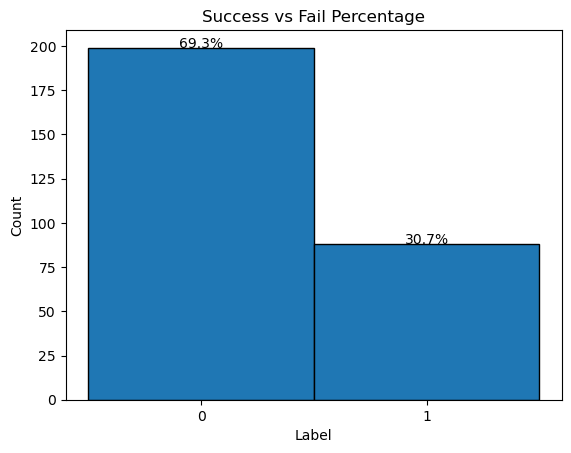

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual df)
# df2 = pd.read_csv('your_file.csv')

# Calculate counts and percentages
counts = df['Label'].value_counts()
percentages = counts / counts.sum() * 100

# Plot histogram with bins for 0 and 1
plt.hist(df['Label'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Success vs Fail Percentage')

# Annotate bars with percentages
for i, pct in zip([0, 1], percentages.sort_index()):
    plt.text(i, counts[i] + 0.2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.show()

# NUS

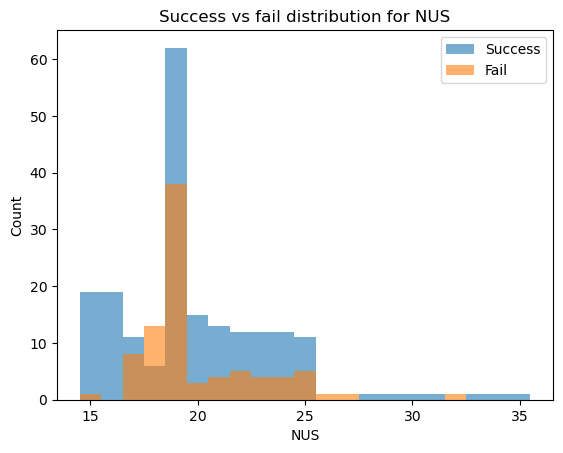

In [10]:
plt.hist(df[df['Label']==0]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Success')
plt.hist(df[df['Label']==1]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Fail')
plt.legend()
plt.xlabel('NUS')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

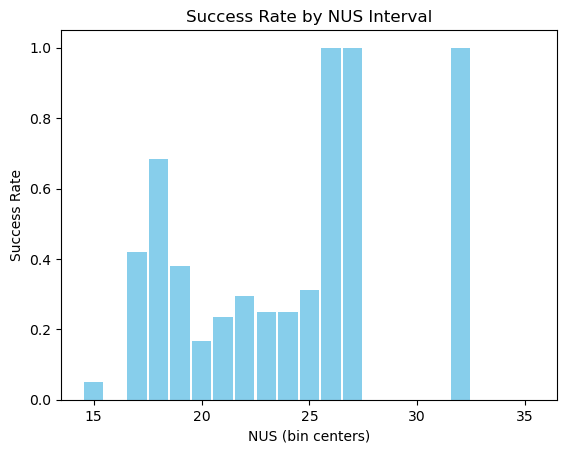

In [26]:
# Define bins for SW from 0.05 to 0.18 with 30 intervals
bins = np.linspace(14.5, 35.5, 22)

# Assign each row to a bin
bin_labels = pd.cut(df['NUS'], bins=bins, include_lowest=True)

# Compute success rate per bin (with observed=False to silence warning)
success_counts = df[bin_labels.notna() & (df['Label'] == 1)].groupby(bin_labels, observed=False).size()
total_counts = df[bin_labels.notna()].groupby(bin_labels, observed=False).size()
success_rate = success_counts / total_counts

# Prepare data for plotting
bin_centers = [interval.mid for interval in success_rate.index]

# Plot histogram of success rate
plt.bar(bin_centers, success_rate.values, width=(bins[1]-bins[0])*0.9, color='skyblue')
plt.xlabel('NUS (bin centers)')
plt.ylabel('Success Rate')
plt.title('Success Rate by NUS Interval')
plt.show()

# SW

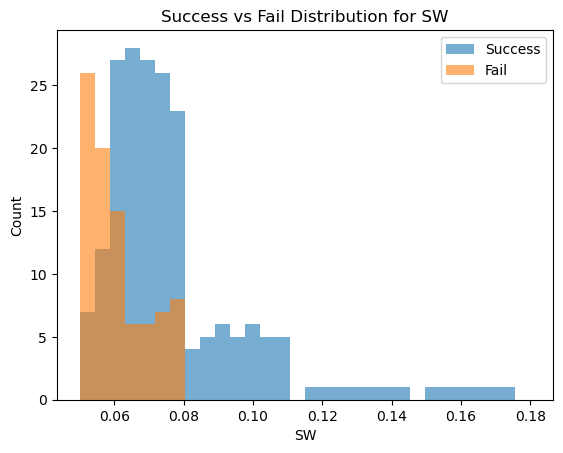

In [18]:
# Define 30 bins between 0.05 and 0.18
bins = np.linspace(0.05, 0.18, 31)

# Plot histograms for Label=1 and Label=0 using the specified bins
plt.hist(df[df['Label'] == 0]['SW'], bins=bins, alpha=0.6, label='Success')
plt.hist(df[df['Label'] == 1]['SW'], bins=bins, alpha=0.6, label='Fail')

# Add labels and title
plt.legend()
plt.xlabel('SW')
plt.ylabel('Count')
plt.title('Success vs Fail Distribution for SW')

# Show the plot
plt.show()


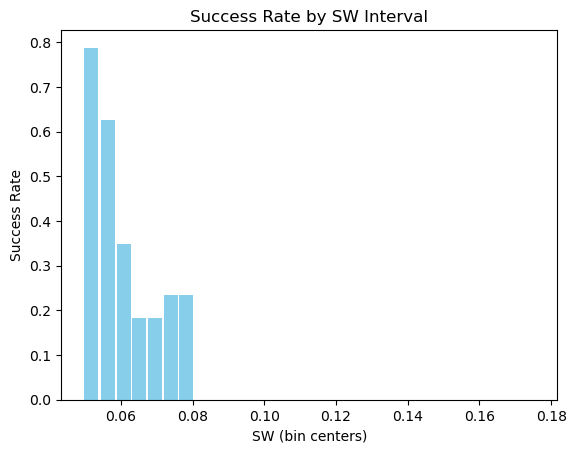

In [21]:
# Define bins for SW from 0.05 to 0.18 with 30 intervals
bins = np.linspace(0.05, 0.18, 31)

# Assign each row to a bin
bin_labels = pd.cut(df['SW'], bins=bins, include_lowest=True)

# Compute success rate per bin (with observed=False to silence warning)
success_counts = df[bin_labels.notna() & (df['Label'] == 1)].groupby(bin_labels, observed=False).size()
total_counts = df[bin_labels.notna()].groupby(bin_labels, observed=False).size()
success_rate = success_counts / total_counts

# Prepare data for plotting
bin_centers = [interval.mid for interval in success_rate.index]

# Plot histogram of success rate
plt.bar(bin_centers, success_rate.values, width=(bins[1]-bins[0])*0.9, color='skyblue')
plt.xlabel('SW (bin centers)')
plt.ylabel('Success Rate')
plt.title('Success Rate by SW Interval')
plt.show()


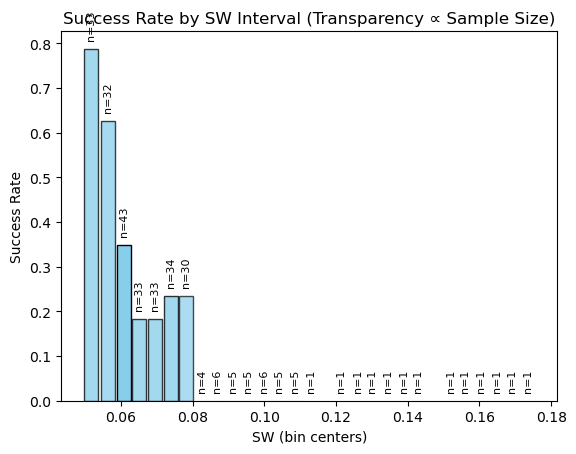

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_file.csv')

# Define bins for SW from 0.05 to 0.18 with 30 intervals
bins = np.linspace(0.05, 0.18, 31)

# Assign each row to a bin
bin_labels = pd.cut(df['SW'], bins=bins, include_lowest=True)

# Compute success counts and total counts per bin
success_counts = df[bin_labels.notna() & (df['Label'] == 1)].groupby(bin_labels, observed=False).size()
total_counts = df[bin_labels.notna()].groupby(bin_labels, observed=False).size()

# Compute success rate
success_rate = success_counts / total_counts

# Prepare data for plotting
bin_centers = [interval.mid for interval in success_rate.index]
bar_width = (bins[1] - bins[0]) * 0.9

# Normalize sample size for alpha scaling
weights = total_counts / total_counts.max()

# Plot bars individually with alpha proportional to sample size
for x, rate, alpha, count in zip(bin_centers, success_rate.values, weights.values, total_counts.values):
    plt.bar(x, rate, width=bar_width, color='skyblue', edgecolor='black', alpha=alpha)
    # Vertical text for n=
    plt.text(x, rate + 0.02, f'n={count}', ha='center', va='bottom', rotation=90, fontsize=8)

plt.xlabel('SW (bin centers)')
plt.ylabel('Success Rate')
plt.title('Success Rate by SW Interval (Transparency ∝ Sample Size)')
plt.show()


# ST

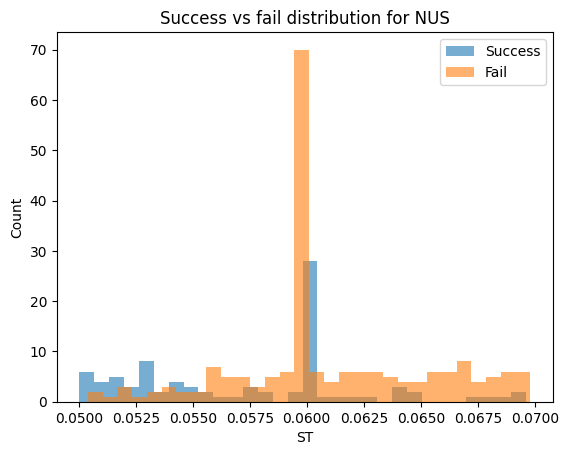

In [9]:
plt.hist(df[df['Label']==1]['ST'], bins=30, alpha=0.6, label='Success')
plt.hist(df[df['Label']==0]['ST'], bins=30, alpha=0.6, label='Fail')
plt.legend()
plt.xlabel('ST')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

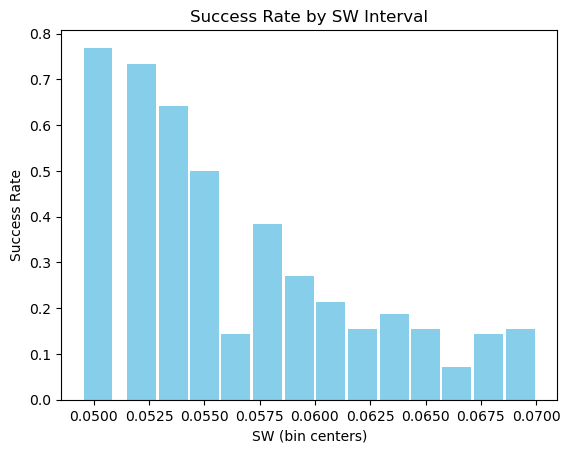

In [23]:
# Define bins for SW from 0.05 to 0.18 with 30 intervals
bins = np.linspace(0.05, 0.07, 15)

# Assign each row to a bin
bin_labels = pd.cut(df['ST'], bins=bins, include_lowest=True)

# Compute success rate per bin (with observed=False to silence warning)
success_counts = df[bin_labels.notna() & (df['Label'] == 1)].groupby(bin_labels, observed=False).size()
total_counts = df[bin_labels.notna()].groupby(bin_labels, observed=False).size()
success_rate = success_counts / total_counts

# Prepare data for plotting
bin_centers = [interval.mid for interval in success_rate.index]

# Plot histogram of success rate
plt.bar(bin_centers, success_rate.values, width=(bins[1]-bins[0])*0.9, color='skyblue')
plt.xlabel('SW (bin centers)')
plt.ylabel('Success Rate')
plt.title('Success Rate by SW Interval')
plt.show()

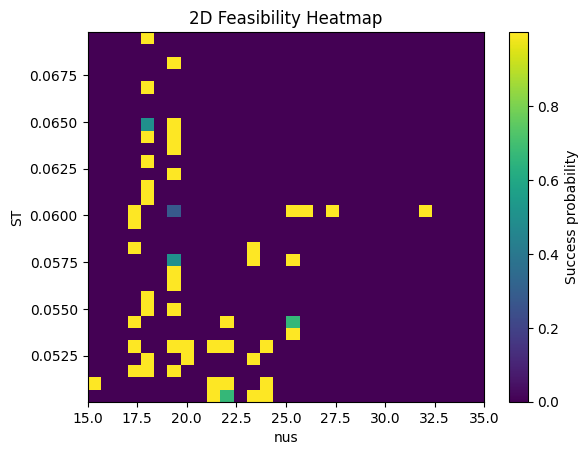

In [19]:
import numpy as np

# Extract variables
x = df['NUS']
y = df['ST']
z = df['Label']  # 0/1

# Create 2D bins
bins = 30
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
counts, _, _ = np.histogram2d(x, y, bins=bins)

# Avoid division by zero
prob = heatmap / (counts + 1e-9)

plt.imshow(prob.T, origin='lower', cmap='viridis',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto')
plt.colorbar(label='Success probability')
plt.xlabel('nus')
plt.ylabel('ST')
plt.title('2D Feasibility Heatmap')
plt.show()


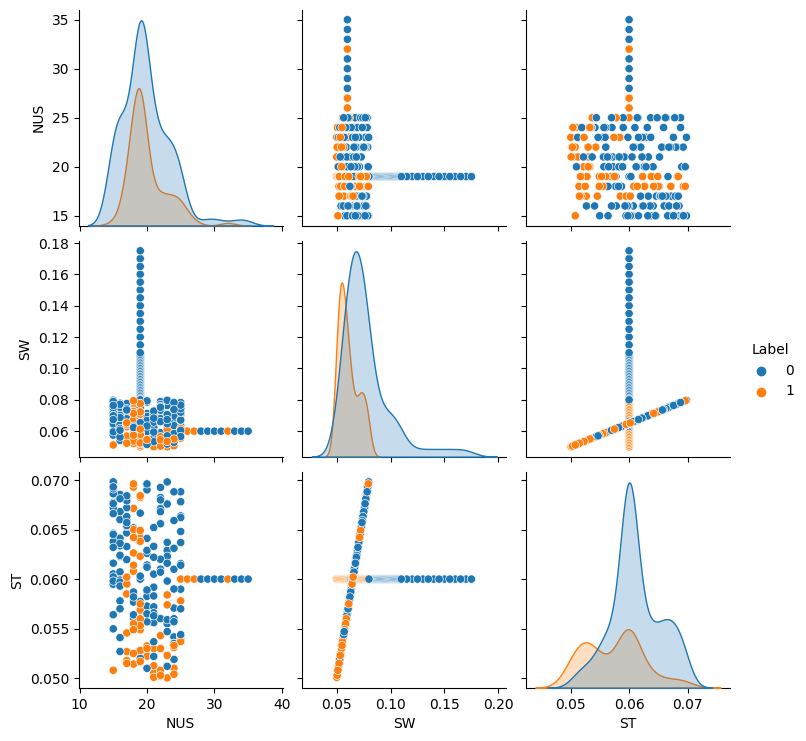

In [21]:
import seaborn as sns

sns.pairplot(df, hue='Label', vars=['NUS','SW','ST'])
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier

X = df[['NUS', 'SW', 'ST']]
y = df['Label']

clf = RandomForestClassifier().fit(X, y)

# Probability of success over a grid for var1 & var2


In [24]:
importances = clf.feature_importances_
for name, importance in zip(['NUS','SW','ST'], importances):
    print(name, importance)


NUS 0.2567458964548749
SW 0.4768579731621717
ST 0.2663961303829535


In [29]:
df2 = df[(df['SW'] >= 0.05) & (df['SW'] <= 0.08)]
df2 = df2[(df2['NUS'] >= 15) & (df2['NUS'] <= 25)]

In [38]:
from sklearn.ensemble import RandomForestClassifier

X = df2[['NUS', 'SW', 'ST']]
y = df2['Label']

clf2 = RandomForestClassifier().fit(X, y)

# Probability of success over a grid for var1 & var2


In [40]:
importances = clf2.feature_importances_
for name, importance in zip(['NUS','SW','ST'], importances):
    print(name, importance)


NUS 0.25868271444349017
SW 0.4160064714984178
ST 0.32531081405809203


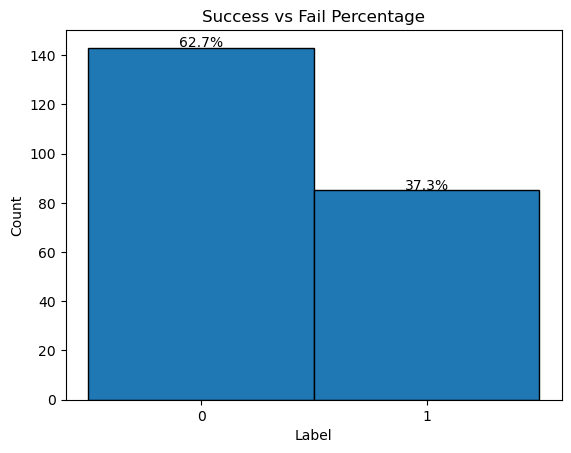

In [35]:
# Calculate counts and percentages
counts = df2['Label'].value_counts()
percentages = counts / counts.sum() * 100

# Plot histogram with bins for 0 and 1
plt.hist(df2['Label'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Success vs Fail Percentage')

# Annotate bars with percentages
for i, pct in zip([0, 1], percentages.sort_index()):
    plt.text(i, counts[i] + 0.2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.show()

In [ ]:
df100= pd.read_csv('labeled_design_space100.csv')

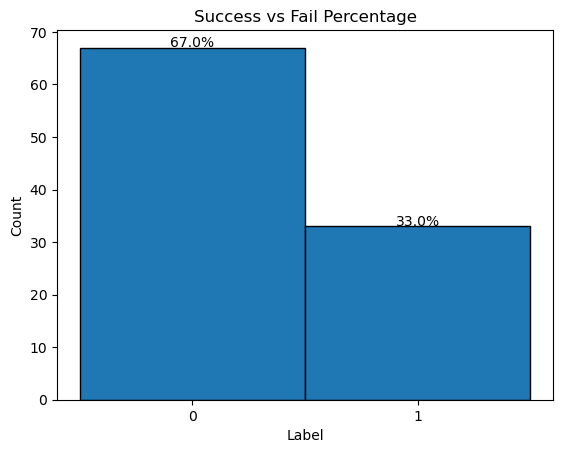

In [36]:
# Calculate counts and percentages
counts = df100['Label'].value_counts()
percentages = counts / counts.sum() * 100

# Plot histogram with bins for 0 and 1
plt.hist(df100['Label'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Success vs Fail Percentage')

# Annotate bars with percentages
for i, pct in zip([0, 1], percentages.sort_index()):
    plt.text(i, counts[i] + 0.2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.show()

In [42]:
df100['ST'].max()

0.0698

## Pairwise plots

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
csv_path = Path("labeled_design_space100.csv")
output_png = Path("design_space_pairwise100.png")
cols_to_plot = ['NUS', 'SW', 'ST']   # only these columns

# --- Load CSV ---
df = pd.read_csv(csv_path)

# Ensure required columns exist
required = set(cols_to_plot + ['Label'])
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing columns in CSV: {missing}\nAvailable: {list(df.columns)}")

# Keep only the columns we need (for safety and order)
df = df[cols_to_plot + ['Label']].copy()

# Coerce to numeric to avoid plotting issues; invalid entries become NaN
for c in cols_to_plot:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Split by label
df0 = df[df['Label'] == 0]
df1 = df[df['Label'] == 1]

# Convert to numpy arrays for speed
X0 = df0[cols_to_plot].to_numpy()
X1 = df1[cols_to_plot].to_numpy()

var_names = cols_to_plot
n = len(var_names)

# --- Build pairwise plot ---
fig, axes = plt.subplots(n, n, figsize=(min(2*n, 20), min(2*n, 20)))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: overlay histograms for Label 0 (red) and Label 1 (blue)
            vals0 = X0[:, i]
            vals1 = X1[:, i]
            vals0 = vals0[~np.isnan(vals0)]
            vals1 = vals1[~np.isnan(vals1)]

            # Use common bins based on combined data for fair comparison
            combined = np.concatenate([vals0, vals1])
            if combined.size == 0:
                bins = 10
            else:
                bins = np.histogram_bin_edges(combined, bins=20)

            ax.hist(vals0, bins=bins, color='red', alpha=0.5, edgecolor='white', label='Label = 0')
            ax.hist(vals1, bins=bins, color='blue', alpha=0.5, edgecolor='white', label='Label = 1')

            # Legend only on diagonal plots (top row to reduce clutter)
            if i == 0:
                ax.legend(fontsize=8)

        else:
            # Off-diagonal: scatter j vs i for both labels
            x0 = X0[:, j]; y0 = X0[:, i]
            x1 = X1[:, j]; y1 = X1[:, i]

            mask0 = ~np.isnan(x0) & ~np.isnan(y0)
            mask1 = ~np.isnan(x1) & ~np.isnan(y1)

            ax.scatter(x0[mask0], y0[mask0], color='red', s=12, alpha=0.6, label='0')
            ax.scatter(x1[mask1], y1[mask1], color='blue', s=12, alpha=0.6, label='1')

            # Compute axis limits with small padding using combined valid data
            def pad_limits_arr(a, b):
                a = a[~np.isnan(a)]; b = b[~np.isnan(b)]
                combined = np.concatenate([a, b])
                if combined.size == 0:
                    return (0, 1)
                mn, mx = np.min(combined), np.max(combined)
                pad = 0.02 * (mx - mn if mx > mn else 1.0)
                return (mn - pad, mx + pad)

            ax.set_xlim(*pad_limits_arr(x0, x1))
            ax.set_ylim(*pad_limits_arr(y0, y1))

        # Axis labels only on left column and bottom row
        if j == 0:
            ax.set_ylabel(var_names[i])
        else:
            ax.set_yticks([])

        if i == n - 1:
            ax.set_xlabel(var_names[j])
        else:
            ax.set_xticks([])

fig.suptitle('Pairwise Plots of Selected Variables (Red: Label=0, Blue: Label=1)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.savefig(output_png, dpi=200, bbox_inches='tight')
plt.close(fig)